In [45]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

df = pd.read_csv('Dry_Bean_Datasetcsv.csv')
pd.set_option('display.max_rows', None)
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [44]:
df[df['Class']=='SIRA'].head(20)

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
7429  31519    676.641       255.073562       157.802740      1.616408   
7430  31751    671.914       244.102719       168.522491      1.448487   
7431  32857    668.106       233.804968       179.500919      1.302528   
7432  33180    670.488       240.969501       175.645040      1.371912   
7433  33206    680.423       260.089827       163.102720      1.594638   
7434  33318    688.874       257.464899       165.036857      1.560045   
7435  33462    689.937       265.469979       161.028495      1.648590   
7436  33493    683.487       252.772376       169.435040      1.491854   
7437  33540    697.714       257.489143       166.559292      1.545931   
7438  33587    672.575       240.377045       178.680774      1.345288   
7439  33605    687.194       259.054738       165.837151      1.562103   
7440  33634    670.530       242.674966       176.839137      1.372292   
7441  33680    683.090       256.203255       167.933494      1.525623   
7442  33739    686.903       255.804344       168.592638      1.517292   
7443  33885    680.022       245.425400       176.316080      1.391963   
7444  34031    691.801       265.571583       163.620210      1.623098   
7445  34099    670.159       237.772205       183.224931      1.297707   
7446  34112    693.800       258.139904       168.696626      1.530202   
7447  34146    789.379       247.660867       176.137973      1.406062   
7448  34189    687.252       249.062125       174.993660      1.423264   

      Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
7429      0.785662       32065     200.327824  0.758033  0.982972   0.865099   
7430      0.723451       32462     201.063743  0.694284  0.978097   0.883771   
7431      0.640764       33185     204.535649  0.775569  0.990116   0.925011   
7432      0.684610       33564     205.538532  0.774835  0.988559   0.927479   
7433      0.778938       33583     205.619047  0.752663  0.988774   0.901298   
7434      0.767535       33692     205.965519  0.698696  0.988899   0.882286   
7435      0.795023       33812     206.410130  0.827284  0.989649   0.883370   
7436      0.742084       34040     206.505719  0.799451  0.983931   0.900956   
7437      0.762609       34165     206.650561  0.725221  0.981706   0.865801   
7438      0.668919       34033     206.795301  0.734190  0.986895   0.933039   
7439      0.768239       34047     206.850707  0.766188  0.987018   0.894242   
7440      0.684825       34002     206.939940  0.797524  0.989177   0.940052   
7441      0.755221       34019     207.081404  0.806803  0.990035   0.907039   
7442      0.752083       34101     207.262705  0.771353  0.989384   0.898569   
7443      0.695620       34281     207.710669  0.811422  0.988448   0.920813   
7444      0.787663       34420     208.157668  0.740738  0.988698   0.893557   
7445      0.637331       34376     208.365533  0.800672  0.991942   0.954104   
7446      0.756919       34507     208.405248  0.777747  0.988553   0.890530   
7447      0.702983       34931     208.509083  0.762664  0.977527   0.688618   
7448      0.711575       34559     208.640329  0.730066  0.989294   0.909629   

      Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
7429     0.785373      0.008093      0.001899      0.616810      0.997017   
7430     0.823685      0.007688      0.002183      0.678457      0.982736   
7431     0.874813      0.007116      0.002571      0.765298      0.996822   
7432     0.852965      0.007262      0.002371      0.727549      0.998133   
7433     0.790569      0.007833      0.001887      0.625000      0.996649   
7434     0.799975      0.007728      0.001952      0.639960      0.998367   
7435     0.777527      0.007933      0.001789      0.604549      0.996653   
7436     0.816963      0.007547      0.002074      0.667429      0.995706   
7437     0.802560      0.007677      0.001965      0.644103      0.995739   
7

In [46]:
#seker, barbunya, bombay, cali, horoz, sira, dermason
label = df['Class']
df['Class'] = label.map({'DERMASON':5,'SIRA':0, 'SEKER': 3, 'HOROZ':2 , 'CALI':4 , 'BARBUNYA': 6 , 'BOMBAY': 1})
label.value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [47]:
df1 = df[df['Class']==0].head(500)
df2 = df[df['Class']==1].head(500)
df3 = df[df['Class']==2].head(500)
df4 = df[df['Class']==3].head(500)
df5 = df[df['Class']==4].head(500)
df6 = df[df['Class']==5].head(500)
df7 = df[df['Class']==6].head(500)

In [48]:
df_list = [df1, df2, df3, df4, df5, df6, df7]
df_all = pd.concat(df_list, ignore_index=True)

In [49]:
from sklearn.preprocessing import MinMaxScaler
data = df_all[['MajorAxisLength', 'MinorAxisLength','AspectRation']]

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)

In [50]:
from sklearn.cluster import KMeans

k = 7

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, init="k-means++",n_init=500, max_iter=500, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
df_all['cluster'] = model.fit_predict(data_scale)

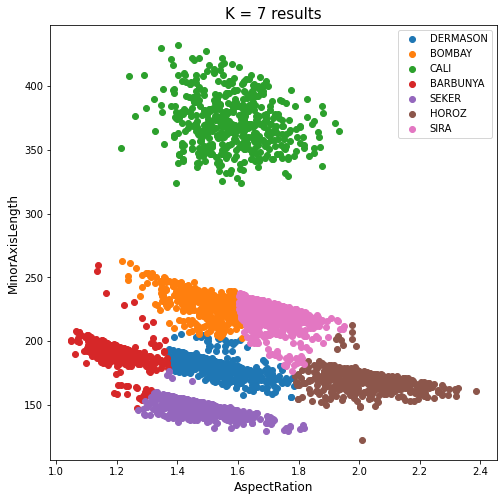

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

list1 = ['DERMASON','BOMBAY','CALI','BARBUNYA','SEKER','HOROZ','SIRA']

for i in range(k):
    plt.scatter(df_all.loc[df_all['cluster'] == i, 'AspectRation'], df_all.loc[df_all['cluster'] == i, 'MinorAxisLength'], 
                label = list1[i])

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('AspectRation', size = 12)
plt.ylabel('MinorAxisLength', size = 12)
plt.show()

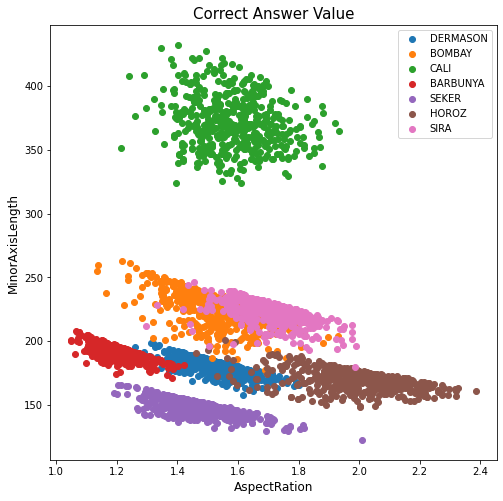

In [68]:
plt.figure(figsize = (8, 8))

list1 = ['DERMASON','BOMBAY','CALI','BARBUNYA','SEKER','HOROZ','SIRA']

for i in range(k):
    plt.scatter(df_all.loc[df_all['Class'] == i, 'AspectRation'], df_all.loc[df_all['Class'] == i, 'MinorAxisLength'], 
                label = list1[i])
plt.legend()
plt.title('Correct Answer Value', size = 15)
plt.xlabel('AspectRation', size = 12)
plt.ylabel('MinorAxisLength', size = 12)
plt.show()

In [65]:
df_all['Class']

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      0
81      0
82      0
83      0
84      0
85      0
86      0
87      0
88      0
89      0
90      0
91      0
92      0
93      0
94      0
95      0
96      0
97      0
98      0
99      0


In [66]:
df_all['cluster']

0       0
1       4
2       3
3       4
4       0
5       0
6       0
7       0
8       0
9       3
10      0
11      4
12      0
13      0
14      0
15      0
16      3
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      3
64      0
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      3
79      0
80      0
81      0
82      0
83      0
84      0
85      3
86      0
87      0
88      0
89      0
90      0
91      0
92      0
93      0
94      0
95      0
96      0
97      0
98      0
99      0


In [55]:
df_all.loc[df_all['Class'] == 1, 'Class'] = 50
df_all.loc[df_all['Class'] == 2, 'Class'] = 60
df_all.loc[df_all['Class'] == 50, 'Class'] = 2
df_all.loc[df_all['Class'] == 60, 'Class'] = 1

In [58]:
df_all.loc[df_all['Class'] == 1, 'Class'] = 50
df_all.loc[df_all['Class'] == 5, 'Class'] = 60
df_all.loc[df_all['Class'] == 50, 'Class'] = 5
df_all.loc[df_all['Class'] == 60, 'Class'] = 1

In [61]:
df_all.loc[df_all['Class'] == 6, 'Class'] = 50
df_all.loc[df_all['Class'] == 4, 'Class'] = 60
df_all.loc[df_all['Class'] == 50, 'Class'] = 4
df_all.loc[df_all['Class'] == 60, 'Class'] = 6

In [64]:
df_all.loc[df_all['Class'] == 1, 'Class'] = 50
df_all.loc[df_all['Class'] == 4, 'Class'] = 60
df_all.loc[df_all['Class'] == 50, 'Class'] = 4
df_all.loc[df_all['Class'] == 60, 'Class'] = 1

In [38]:
df_all.loc[df_all['Class'] == 3, 'Class'] = 50
df_all.loc[df_all['Class'] == 0, 'Class'] = 60
df_all.loc[df_all['Class'] == 50, 'Class'] = 0
df_all.loc[df_all['Class'] == 60, 'Class'] = 3

In [71]:
accuracy_score(df_all['Class'], df_all['cluster'])*100

89.94285714285715

In [ ]:
del df_all

In [99]:
from sklearn.decomposition import PCA
X = df_all[df_all.columns[:-1]]
pca  = PCA(n_components=8)
pca.fit(X)
pca_array = pca.transform(X)

In [82]:
len(pca_array)

3500

In [101]:
for i in range(0,3500):
    df_all['new1'][i] = pca_array[i][0]

C:\Users\eeot2\AppData\Local\Temp/ipykernel_15176/2562392056.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['new1'][i] = pca_array[i][0]


In [102]:
for i in range(0,3500):
    df_all['new2'][i] = pca_array[i][1]

C:\Users\eeot2\AppData\Local\Temp/ipykernel_15176/1189016471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['new2'][i] = pca_array[i][1]


In [ ]:
pca_array[0][1]

In [92]:
pca_array

array([[-7.66297876e+04,  5.84073236e+01,  3.60016363e+01, ...,
         3.25776545e+00, -6.49827584e-01, -1.15187881e+00],
       [-7.58581289e+04,  1.71012047e+02,  5.47888852e+01, ...,
         3.28098077e+00, -1.35174814e-01,  2.26082679e-02],
       [-7.36213674e+04, -1.08873310e+02,  4.92541549e+01, ...,
         3.09910857e+00,  6.85883669e-02, -1.64113137e-01],
       ...,
       [ 1.10699853e+04,  4.65216773e+02, -9.29137159e+01, ...,
         2.50838088e-02, -2.93497942e-01, -7.05476008e-01],
       [ 1.06451272e+04,  1.83015093e+02, -9.00960528e+01, ...,
        -4.76718946e-01, -5.09323533e-01, -5.83816357e-01],
       [ 1.03936776e+04, -2.98542631e+01, -6.42092303e+01, ...,
        -9.15795282e-01, -3.96072893e-01, -6.16134296e-01]])

In [97]:
df_all['new1']

0       -76629.787600
1       -75858.128934
2       -73621.367387
3       -72761.126701
4       -72705.960426
5       -72435.263852
6       -72112.116200
7       -71793.355062
8       -71581.937506
9       -71687.750917
10      -71648.445993
11      -71668.815988
12      -71591.777427
13      -71418.873219
14      -71019.408510
15      -70670.296002
16      -70642.051341
17      -70464.493372
18      -69899.607883
19      -70306.781480
20      -70043.627458
21      -70086.994236
22      -69338.322644
23      -69236.971100
24      -69030.650736
25      -69088.999192
26      -68667.255530
27      -68897.460521
28      -68583.967173
29      -68716.726571
30      -68474.456422
31      -68585.847125
32      -68261.640137
33      -68358.678655
34      -68163.425177
35      -67984.786511
36      -68006.634403
37      -67958.762608
38      -67643.215933
39      -67774.959010
40      -67606.632784
41      -67375.385906
42      -67293.259554
43      -67066.042668
44      -67080.030814
45      -6

In [100]:
from sklearn.cluster import KMeans

k = 7

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, init="k-means++",n_init=500, max_iter=500, random_state = 10)

# 정규화된 데이터에 학습
model.fit(pca_array)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
df_all['cluster'] = model.fit_predict(pca_array)

In [85]:
df_all

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      31519    676.641       255.073562       157.802740      1.616408   
1      31751    671.914       244.102719       168.522491      1.448487   
2      32857    668.106       233.804968       179.500919      1.302528   
3      33180    670.488       240.969501       175.645040      1.371912   
4      33206    680.423       260.089827       163.102720      1.594638   
5      33318    688.874       257.464899       165.036857      1.560045   
6      33462    689.937       265.469979       161.028495      1.648590   
7      33493    683.487       252.772376       169.435040      1.491854   
8      33540    697.714       257.489143       166.559292      1.545931   
9      33587    672.575       240.377045       178.680774      1.345288   
10     33605    687.194       259.054738       165.837151      1.562103   
11     33634    670.530       242.674966       176.839137      1.372292   
12     33680    683.090       256.203255       167.933494      1.525623   
13     33739    686.903       255.804344       168.592638      1.517292   
14     33885    680.022       245.425400       176.316080      1.391963   
15     34031    691.801       265.571583       163.620210      1.623098   
16     34099    670.159       237.772205       183.224931      1.297707   
17     34112    693.800       258.139904       168.696626      1.530202   
18     34146    789.379       247.660867       176.137973      1.406062   
19     34189    687.252       249.062125       174.993660      1.423264   
20     34238    698.847       255.829224       170.867098      1.497241   
21     34242    682.082       247.619377       177.084648      1.398311   
22     34459    698.401       254.099314       173.059909      1.468274   
23     34593    697.522       259.730093       170.162766      1.526363   
24     34645    702.351       259.162342       171.458665      1.511515   
25     34663    691.502       252.525161       175.379706      1.439877   
26     34668    704.917       268.274534       166.900776      1.607389   
27     34717    700.168       262.516203       168.811053      1.555089   
28     34783    724.442       252.194489       175.888535      1.433831   
29     34825    704.926       264.593648       168.285561      1.572290   
30     34862    702.718       264.018492       168.737781      1.564667   
31     34892    710.337       273.749108       163.000447      1.679438   
32     34894    707.258       264.384171       168.960043      1.564773   
33     34942    701.872       250.916336       178.058144      1.409182   
34     34990    700.748       257.018073       174.021504      1.476933   
35     35077    707.652       261.085217       172.992521      1.509228   
36     35129    703.253       268.447391       167.170267      1.605832   
37     35135    692.108       253.099675       176.909643      1.430672   
38     35152    711.890       265.192520       169.688513      1.562820   
39     35215    711.318       269.117831       167.095693      1.610561   
40     35249    706.381       272.659872       165.283573      1.649649   
41     35291    723.178       276.239696       163.161308      1.693047   
42     35380    697.382       255.580592       176.775312      1.445793   
43     35444    716.279       268.080553       169.823997      1.578579   
44     35468    711.867       273.142959       165.972537      1.645712   
45     35476    711.317       266.850827       169.928349      1.570373   
46     35506    713.086       262.106215       173.247828      1.512898   
47     35561    708.141       259.768348       174.810552      1.485999   
48     35570    710.530       263.260383       173.378732      1.518412   
49     35633    712.676       262.588482       173.493726      1.513533   
50     35640    688.039       254.517074       178.727981      1.424047   
51     35734    704.049       255.609616       178.903958      1.428753   
52     35791    710.277       262

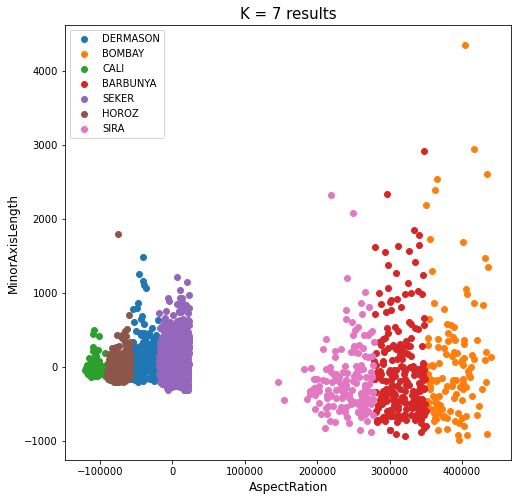

In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

list1 = ['DERMASON','BOMBAY','CALI','BARBUNYA','SEKER','HOROZ','SIRA']

for i in range(k):
    plt.scatter(df_all.loc[df_all['cluster'] == i, 'new1'], df_all.loc[df_all['cluster'] == i, 'new2'], 
                label = list1[i])

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('AspectRation', size = 12)
plt.ylabel('MinorAxisLength', size = 12)
plt.show()

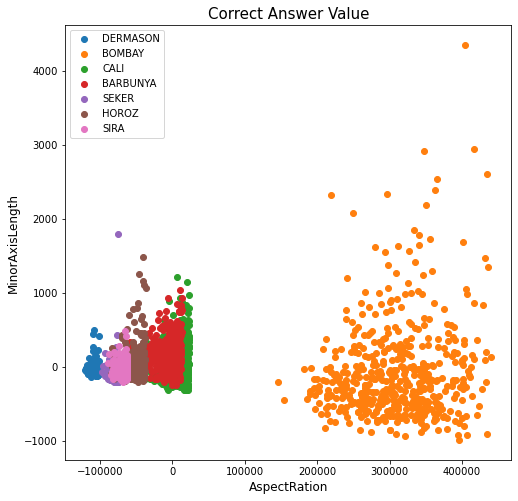

In [104]:
plt.figure(figsize = (8, 8))

list1 = ['DERMASON','BOMBAY','CALI','BARBUNYA','SEKER','HOROZ','SIRA']

for i in range(k):
    plt.scatter(df_all.loc[df_all['Class'] == i, 'new1'], df_all.loc[df_all['Class'] == i, 'new2'], 
                label = list1[i])
plt.legend()
plt.title('Correct Answer Value', size = 15)
plt.xlabel('AspectRation', size = 12)
plt.ylabel('MinorAxisLength', size = 12)
plt.show()

In [1]:
def get_silhouette_results(X, labels):
    def get_sum_distance(target_x, target_cluster):
        res = np.sum([np.linalg.norm(target_x-x) for x in target_cluster])
        return res
    
    '''
    각 데이터 포인트를 돌면서 a(i), b(i)를 계산
    그리고 s(i)를 계산한다.
    
    마지막으로 Silhouette(실루엣) Coefficient를 계산한다.
    '''
    uniq_labels = np.unique(labels)
    silhouette_val_list = []
    for i in range(len(labels)):
        target_data = X[i]
 
        ## calculate a(i)
        target_label = labels[i]
        target_cluster_data_idx = np.where(labels==target_label)[0]
        if len(target_cluster_data_idx) == 1:
            silhouette_val_list.append(0)
            continue
        else:
            target_cluster_data = X[target_cluster_data_idx]
            temp1 = get_sum_distance(target_data, target_cluster_data)
            a_i = temp1/(target_cluster_data.shape[0]-1)
 
        ## calculate b(i)
        b_i_list = []
        label_list = uniq_labels[np.unique(labels) != target_label]
        for ll in label_list:
            other_cluster_data_idx = np.where(labels==ll)[0]
            other_cluster_data = X[other_cluster_data_idx]
            temp2 = get_sum_distance(target_data, other_cluster_data)
            temp_b_i = temp2/other_cluster_data.shape[0]
            b_i_list.append(temp_b_i)
 
        b_i = min(b_i_list)
        s_i = (b_i-a_i)/max(a_i, b_i)
        silhouette_val_list.append(s_i)
 
    silhouette_coef_list = []
    for ul in uniq_labels:
        temp3 = np.mean([s for s, l in zip(silhouette_val_list, labels) if l == ul])
        silhouette_coef_list.append(temp3)
 
    silhouette_coef = max(silhouette_coef_list)
    return (silhouette_coef, np.array(silhouette_val_list))

In [74]:
import numpy as np
labels = model.labels_
silhouette_coef, silhouette_val_list = get_silhouette_results(data_scale, labels)
print(silhouette_coef)

0.7166777763282708
